0.007853981633974482 0.38197185377112797


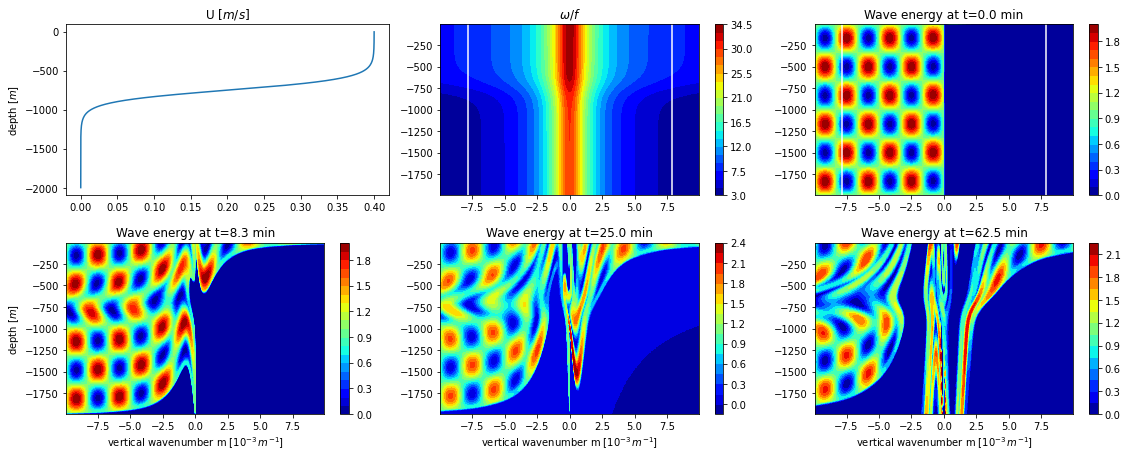

In [149]:
import numpy as np
import pylab as plt


from netCDF4 import Dataset as NF

plt.rcParams['image.cmap'] = 'jet'


ifid=NF('snap6D.cdf',mode='r')
E = ifid.variables['E'][:]
om = ifid.variables['omega_e'][:]
mdot = ifid.variables['mdot'][:]
zdot = ifid.variables['zdot'][:]
xt = ifid.variables['xt'][:]
yt = ifid.variables['yt'][:]
zt = ifid.variables['zt'][:]
kt = ifid.variables['kt'][:]
lt = ifid.variables['lt'][:]
mt = ifid.variables['mt'][:]

dxt = ifid.variables['dxt'][:]
dyt = ifid.variables['dyt'][:]
dzt = ifid.variables['dzt'][:]
dkt = ifid.variables['dkt'][:]
dlt = ifid.variables['dlt'][:]
dmt = ifid.variables['dmt'][:]

ifid.close()

DMT,DLT,DKT,DZT,DYT,DXT = np.meshgrid(dmt,dlt,dkt,dzt,dyt,dxt,indexing='ij')


ifid=NF('snap3D.cdf',mode='r')

U = ifid.variables['U'][:]
Nsqr = ifid.variables['Nsqr'][:]
t = ifid.variables['Time'][:]
meanfl_int = ifid.variables['meanfl'][:]
diss_ks   =  ifid.variables['diss_ks'][:]
diss_ke   =  ifid.variables['diss_ke'][:]
diss_ls   =  ifid.variables['diss_ls'][:]
diss_le   =  ifid.variables['diss_le'][:]
diss_ms   =  ifid.variables['diss_ms'][:]
diss_me   =  ifid.variables['diss_me'][:]
ifid.close()


diss = diss_ke-diss_ks
diss += diss_le-diss_ls
diss += diss_me-diss_ms


jstar = 5.
cs = np.sum( np.sqrt(Nsqr)*DZT[0,0,0,:,:,:], axis = 0)/np.pi/jstar
ms = np.sqrt(Nsqr)/cs[np.newaxis,:,:]
ms = np.mean(np.mean(ms,axis=2),axis=1)


print (np.mean(ms),np.mean(np.mean(cs,axis=1),axis=0))
x,y=0,0

plt.figure(figsize=(16,9),tight_layout=True)


ax = plt.subplot(3,3,1)
ax.plot(U[:,y,x],zt   ) 
ax.set_title('U [$m/s$]')
ax.set_ylabel('depth [$m$]')

ax = plt.subplot(3,3,2)
om[ om<1e-4 ] = np.nan
co = plt.contourf(mt*1e3,zt, om[:,0,0,:,0,0].T/1e-4,20)#,colors='k') 
plt.colorbar(co)
ax.plot(-ms*1e3,zt,'w')
ax.plot(+ms*1e3,zt,'w')
 
ax.set_title('$\omega/f$')

col = 20#np.arange(0,2.6,0.1)

ax = plt.subplot(3,3,3)
#co = plt.contourf(kt,lt, np.sum(meanfl[:,:,:,12,0,0]*DMT[:,:,:,9,0,0],axis=0)) 
#co = plt.contourf(lt,mt,np.log10( np.sum(E0[:,:,:,12,0,0]*DKT[:,:,:,9,0,0],axis=2) ) ) 
#a = np.sum(np.sum(E0*DKT*DLT,axis=2),axis=1) 
co = plt.contourf(mt*1e3,zt, E[0,:,0,0,:,0,0].T,col) 
#co = plt.contourf(mt*1e3,zt, zdot[:,0,0,:,0,0].T) 
plt.colorbar(co)
ax.plot(-ms*1e3,zt,'w')
ax.plot(+ms*1e3,zt,'w')

                  
ax.set_title('Wave energy at t=%3.1f min'%(t[0],))

ax = plt.subplot(3,3,4)
co = plt.contourf(mt*1e3,zt,E[2,:,0,0,:,0,0].T,col) 
plt.colorbar(co)
ax.set_title('Wave energy at t=%3.1f min'%(t[2]/60,))
ax.set_ylabel('depth [$m$]')         
ax.set_xlabel('vertical wavenumber m [$10^{-3} \, m^{-1}$]')

ax = plt.subplot(3,3,5)
co = plt.contourf(mt*1e3,zt,E[6,:,0,0,:,0,0].T,col) 
plt.colorbar(co)
ax.set_title('Wave energy at t=%3.1f min'%(t[6]/60,))
ax.set_xlabel('vertical wavenumber m [$10^{-3} \, m^{-1}$]')

ax = plt.subplot(3,3,6)
co = plt.contourf(mt*1e3,zt,E[15,:,0,0,:,0,0].T,col) 
plt.colorbar(co)
ax.set_title('Wave energy at t=%3.1f min'%(t[15]/60,))
ax.set_xlabel('vertical wavenumber m [$10^{-3} \, m^{-1}$]')

plt.savefig('tmp.png')
plt.show()

In [139]:

print (np.mean(ms[:]))


2.727076956241139e-07
